# Cats vs Dogs


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from PIL import ImageDraw
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier as xgb
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from keras.preprocessing.image import img_to_array


In [3]:
url = 'C:\\Users\\Shlomit\\Desktop\\train'
titles = os.listdir(url)

In [4]:
category =[]
for title in titles:
    title = title.split('.')[0]
    if title == "cat":
        category.append(0)
    else:
        category.append(1)
categories = pd.DataFrame({'title': titles , 'category': category})

In [6]:
categories

,title,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


### Let's show few pictures

In [8]:
# Create figure with 2x2 sub-plots.
def plot_images(images, labels):
  fig, axes = plt.subplots(2, 2)
  fig.subplots_adjust(hspace=0.5 , wspace=0.3)

  for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(mpimg.imread(images[i]))
    
    # Plot label
    ax.set_xlabel('Label : %s' % labels[i])
        
        
  plt.show()

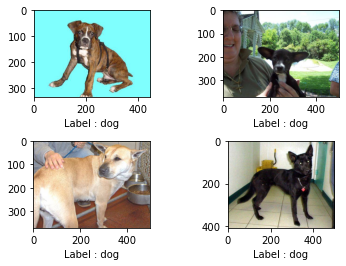

In [9]:
img_paths = []
img_labels = []
for i in range(10):
  # pick 4 random ids from the dataset
  rand_id = np.random.randint(0, len(titles))
  
  # get the img path from the id
  filename = categories.loc[rand_id, 'title'] 
  path = os.path.join(url, filename)
  img_paths.append(path)
  
  # get the img label from the id
  img_label = categories.loc[rand_id, 'category'] 
  if img_label == 1:
    img_labels.append('dog')
  else:
    img_labels.append('cat')
  
plot_images(img_paths, img_labels)

## That is before cleaning data, let's claen it!

In [11]:
pixels = []
for t in titles:
    file = os.path.join(url , t)
    img = Image.open(file)
    resize = img.resize((100,100))
    bw = resize.convert(mode='L')
   # temp = list(bw.getdata())
    temp = img_to_array(bw)
    pixels = pixels +[temp]
  #  bw.save(r'C:\לימודים\סמסטר ב\הדמיית נתונים\פרוייקט גמר\dogs-vs-cats\train\resize_bw\\' + t)

In [20]:
pixels[0].shape

(100, 100, 1)

### And now, lets show the cleaning pictures

In [12]:
column = []
for i in range(0,100*100):
    column.append('pixel' + str(i))

In [44]:
for i in range(0,25000):
    pixels[i]=pixels[i].reshape(10000,)


In [47]:
pixels[5].shape

(10000,)

In [48]:
dfNew=pd.DataFrame(data = pixels , columns = column)

MemoryError: 

In [ ]:
dfNew

In [11]:
df = pd.DataFrame(data = pixels , columns = column)

In [12]:
df['label'] = categories['category']

In [13]:
df 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,label
0,169,173,177,182,185,188,190,194,196,198,...,3,3,2,2,2,2,2,2,2,0
1,43,43,50,47,44,39,43,42,41,53,...,51,55,56,54,68,74,68,35,36,0
2,34,31,44,46,45,53,56,56,54,56,...,163,150,134,134,146,158,169,170,154,0
3,222,223,223,226,231,227,228,232,229,227,...,211,203,204,205,215,221,216,212,213,0
4,116,119,125,96,81,93,134,131,154,181,...,96,97,93,101,118,95,91,95,83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,142,143,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,97,79,99,91,87,100,81,81,95,76,...,94,85,95,85,82,85,98,96,71,1
24997,45,43,48,59,64,51,53,52,52,44,...,145,124,97,112,132,159,107,129,164,1
24998,254,251,244,234,222,205,180,143,101,72,...,100,98,102,102,111,111,113,114,114,1


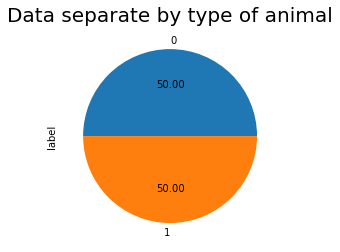

In [14]:
df["label"].value_counts().plot(kind = "pie", autopct = "%.2f" )
plt.title('Data separate by type of animal',fontsize=20)
plt.show()

### well, our data is balanced, lets look the data

In [15]:
df.describe(include = 'all')

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,label
count,25000.000000,25000.00000,25000.00000,25000.00000,25000.00000,25000.000000,25000.00000,25000.000000,25000.00000,25000.000000,...,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,114.247960,114.59004,114.83796,115.22768,115.63592,115.998160,116.39900,116.634200,117.09612,117.218840,...,124.38460,123.940840,123.445560,122.939080,122.391840,121.836600,121.219080,120.753320,120.389880,0.50000
std,68.985043,68.77785,68.68357,68.64397,68.55194,68.444718,68.36624,68.424277,68.55232,68.467713,...,65.01052,65.040327,65.096998,65.242743,65.432194,65.511698,65.562679,65.605986,65.905611,0.50001
min,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,57.000000,58.00000,58.00000,58.00000,59.00000,60.000000,60.00000,61.000000,60.00000,61.000000,...,74.00000,73.000000,73.000000,72.000000,71.750000,71.000000,70.000000,69.000000,69.000000,0.00000
50%,108.000000,109.00000,109.00000,110.00000,111.00000,111.000000,112.00000,112.000000,113.00000,113.000000,...,123.00000,122.000000,121.000000,121.000000,120.000000,120.000000,119.000000,118.000000,117.000000,0.50000
75%,164.000000,165.00000,165.00000,165.00000,166.00000,166.000000,167.00000,167.000000,167.00000,168.000000,...,172.00000,171.000000,170.250000,170.000000,170.000000,169.000000,168.000000,168.000000,167.000000,1.00000
max,255.000000,255.00000,255.00000,255.00000,255.00000,255.000000,255.00000,255.000000,255.00000,255.000000,...,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,1.00000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 10001 entries, pixel0 to label
dtypes: int64(10001)
memory usage: 1.9 GB


In [17]:
df.isnull().sum(axis=1).sum(axis=0)

0

## making new features

In [18]:
df['sum'] = df[column].sum(axis = 1)

In [112]:
df['pixel_mean'] = df[column].mean(axis=1)

In [114]:
df['pixel_median'] = df[column].median(axis=1)

In [115]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,label,sum,pixel_mean,pixel_median
0,169,173,177,182,185,188,190,194,196,198,...,2,2,2,2,2,2,0,1333744,133.3744,140.0
1,43,43,50,47,44,39,43,42,41,53,...,54,68,74,68,35,36,0,713735,71.3735,69.0
2,34,31,44,46,45,53,56,56,54,56,...,134,146,158,169,170,154,0,1118691,111.8691,120.0
3,222,223,223,226,231,227,228,232,229,227,...,205,215,221,216,212,213,0,1663447,166.3447,175.0
4,116,119,125,96,81,93,134,131,154,181,...,101,118,95,91,95,83,0,1058964,105.8964,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,142,143,145,146,147,148,149,148,149,...,167,168,168,168,168,169,1,1085776,108.5776,151.0
24996,97,79,99,91,87,100,81,81,95,76,...,85,82,85,98,96,71,1,720504,72.0504,73.0
24997,45,43,48,59,64,51,53,52,52,44,...,112,132,159,107,129,164,1,1001014,100.1014,99.0
24998,254,251,244,234,222,205,180,143,101,72,...,102,111,111,113,114,114,1,1255901,125.5901,126.0


### X-Y train split

In [116]:
y_train = df['label']
X_train = df.drop('label' , axis=1)

In [117]:
X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### scaling

In [118]:
X_train = X_train/255
x_test = x_test/255 

### pca

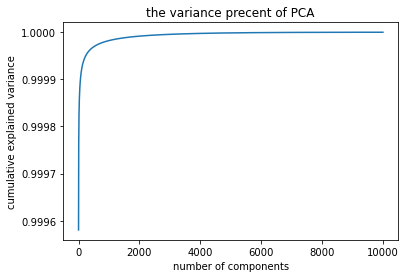

In [204]:
pcb = PCA().fit(X_train)
plt.plot(np.cumsum(pcb.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title("the variance precent of PCA")
plt.show()

In [207]:
pca = PCA(n_components=5000)
X = pca.fit_transform(X_train)
X_test = pca.transform(x_test)

In [100]:
X_train.shape

(20000, 10001)

In [213]:
tsne = TSNE(n_components=2, init='pca', random_state=10)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(x_test)

C:\Users\97253\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\97253\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\97253\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\97253\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [214]:
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = X_train_tsne[:,0]
df["comp-2"] = X_train_tsne[:,1]
fig = plt.gcf()

fig.set_size_inches(12, 8)
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Hall Of Fame data T-SNE projection")

NameError: name 'sns' is not defined

<Figure size 864x576 with 0 Axes>

#### we will split our data for using a dummy model and other models without using  cross-validation, when we use cross-validation we will work with our whole data

In [208]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y_train, test_size=0.25 , random_state=42)

### dummy model

In [120]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_split, y_train_split)

predict = dummy.predict(X_test_split)
dummy.score(predict , y_test_split)

0.485

### well, this grade is almost 50% because our data is balanced

## k-nn

In [146]:
knn = KNeighborsClassifier(n_neighbors=5)
cv = cross_val_score(knn , X , y_train , cv = 10 , scoring = 'accuracy')
max(cv)

0.5485

In [ ]:
#pca with 3000 compenents gives 0.55
#without pca we get 0.48

In [124]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
score = []
for k in list(range(1,30,2)):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn , X_train , y_train , cv = kf , scoring = 'Accuracy')
    score.append(cv.mean())
score

[0.5246509828659208,
 0.5383932494906907,
 0.5533615021213413,
 0.5593480000121299,
 0.5607116659729743,
 0.5686391792542632,
 0.5739983318607017,
 0.5779324597685082,
 0.5817981292416572,
 0.583834860860398,
 0.5874476522447536,
 0.5890518480476512,
 0.591971617150841,
 0.5914516263555925,
 0.5934064680468337]

In [125]:
max(score)

0.5934064680468337

## gread search

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
k_range = list(range(1,31,2))
weights = ['uniform', 'distance']
metrics_options = ['euclidean', 'manhattan']
param_grid = dict(n_neighbors = k_range , weights = weights, metric = metrics_options)
grid = GridSearchCV(knn , param_grid , cv = kf , scoring= 'Accuracy')
grid.fit(X_train , y_train)
gs = pd.DataFrame(grid.cv_results_)[['mean_test_score' ,  'params' ]].set_index('params')
gs
mean_test_score

## desicion tree

In [190]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
DecisionTree = DecisionTreeClassifier()

scores = cross_val_score(DecisionTree, X_train, y_train, cv=5, scoring='accuracy')

print("The score of Decision Tree is:" + str(scores.mean()))

The score of Decision Tree is:0.5547000000000001


## random forest

In [184]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
forest = RandomForestClassifier(n_estimators=100 , n_jobs = -1, random_state =42, max_depth=50)

scores_rf = cross_val_score(forest, X, y_train, cv=4, scoring='accuracy')

print("The score of random forest is:" + str(scores_rf.mean()))

The score of random forest is:0.5849


## xgboost

In [151]:
xgb_classifier.best_iteration

99

In [209]:

xgboost = XGBClassifier(objective='binary:logistic', missing=1, seed=42)
xgb_classifier = xgboost.fit(X_train_split,
                    y_train_split,
                    verbose=True,
                    early_stopping_rounds=10,
                    eval_metric='aucpr',
                    eval_set=[(X_test_split,y_test_split)])



C:\Users\97253\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\97253\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.56715
[1]	validation_0-aucpr:0.59725
[2]	validation_0-aucpr:0.60558
[3]	validation_0-aucpr:0.61523
[4]	validation_0-aucpr:0.61540
[5]	validation_0-aucpr:0.61925
[6]	validation_0-aucpr:0.62332
[7]	validation_0-aucpr:0.62400
[8]	validation_0-aucpr:0.62774
[9]	validation_0-aucpr:0.62500
[10]	validation_0-aucpr:0.62631
[11]	validation_0-aucpr:0.62625
[12]	validation_0-aucpr:0.62740
[13]	validation_0-aucpr:0.62968
[14]	validation_0-aucpr:0.62650
[15]	validation_0-aucpr:0.62509
[16]	validation_0-aucpr:0.62766
[17]	validation_0-aucpr:0.62621
[18]	validation_0-aucpr:0.62463
[19]	validation_0-aucpr:0.62522
[20]	validation_0-aucpr:0.62642
[21]	validation_0-aucpr:0.62985
[22]	validation_0-aucpr:0.63282
[23]	validation_0-aucpr:0.63238
[24]	validation_0-aucpr:0.63581
[25]	validation_0-aucpr:0.63683
[26]	validation_0-aucpr:0.63817
[27]	validation_0-aucpr:0.63643
[28]	validation_0-aucpr:0.63585
[29]	validation_0-aucpr:0.63468
[30]	validation_0-aucpr:0.63466
[31]	validation_0-

well, the best score of xgboost is round 99

## AdaBoost

In [172]:
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_train_split , y_train_split)
y_pred = AdaBoost.predict(X_test_split)
metrics.accuracy_score(y_pred, y_test_split)

0.5862

In [173]:
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=3), n_estimators=150,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train_split, y_train_split)
prediction_test = ada_clf.predict(x_test_Split)
(metrics.accuracy_score(y_test_split, prediction_test))

NameError: name 'x_test_Split' is not defined

### Voting classifier

In [191]:
estimators=[('K-NN' , knn),('RF',forest),('DT', DecisionTree),('ADA',AdaBoost) , ('xgb' , xgboost)]

#### hard voting

In [192]:
vot_hard = VotingClassifier(estimators = estimators, voting ='hard')
vot_hard.fit(X_train_split , y_train_split)
y_pred = vot_hard.predict(X_test_split)
accuracy_score = metrics.accuracy_score(y_test_split, y_pred)
print("The accuracy score of Hard Voting is:"+str(accuracy_score))

The accuracy score of Hard Voting is:0.6472


#### soft voting

In [194]:
vot_soft = VotingClassifier(estimators = estimators, voting ='soft')
vot_soft.fit(X_train_split, y_train_split)
y_pred = vot_soft.predict(X_test_split)
accuracy_score = metrics.accuracy_score(y_test_split, y_pred)
print("The accuracy score of Soft Voting is:"+str(accuracy_score))

The accuracy score of Soft Voting is:0.6118


###### so, our best model is ___ with ___ , lets check the test!

In [210]:
xgboost = XGBClassifier(objective='binary:logistic', missing=1, seed=42)
xgb_classifier = xgboost.fit(X,
                    y_train,
                    verbose=True,
                    early_stopping_rounds=10,
                    eval_metric='aucpr',
                    eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.55555
[1]	validation_0-aucpr:0.57504
[2]	validation_0-aucpr:0.58724
[3]	validation_0-aucpr:0.59161
[4]	validation_0-aucpr:0.59576
[5]	validation_0-aucpr:0.59986
[6]	validation_0-aucpr:0.60166
[7]	validation_0-aucpr:0.60627
[8]	validation_0-aucpr:0.60810
[9]	validation_0-aucpr:0.60997
[10]	validation_0-aucpr:0.60539
[11]	validation_0-aucpr:0.61083
[12]	validation_0-aucpr:0.60872
[13]	validation_0-aucpr:0.60971
[14]	validation_0-aucpr:0.61209
[15]	validation_0-aucpr:0.61539
[16]	validation_0-aucpr:0.61412
[17]	validation_0-aucpr:0.61435
[18]	validation_0-aucpr:0.61490
[19]	validation_0-aucpr:0.61650
[20]	validation_0-aucpr:0.61718
[21]	validation_0-aucpr:0.61729
[22]	validation_0-aucpr:0.61887
[23]	validation_0-aucpr:0.61845
[24]	validation_0-aucpr:0.61879
[25]	validation_0-aucpr:0.61907
[26]	validation_0-aucpr:0.61975
[27]	validation_0-aucpr:0.61812
[28]	validation_0-aucpr:0.61675
[29]	validation_0-aucpr:0.61629
[30]	validation_0-aucpr:0.61536
[31]	validation_0-